### **Import Packages**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### **Load Data** **&** **Preprocessing**

In [3]:
# loading the data 
df = pd.read_csv('/content/mail_data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [6]:
# replace the null values with a null string
mail_data = df.where((pd.notnull(df)),'')

In [7]:
mail_data.sample(5)

,Category,Message
4268,ham,SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBE...
5004,spam,CDs 4u: Congratulations ur awarded £500 of CD ...
3662,ham,Well then you have a great weekend!
2120,ham,I hope you know I'm still mad at you.
4194,ham,Ok i'm coming home now.


In [8]:
mail_data.shape

(5572, 2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


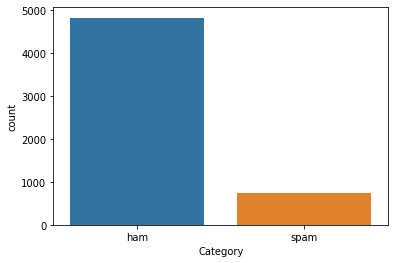

In [11]:
sns.countplot(mail_data['Category'])

In [12]:
# label spam mail as 0;  ham mail as 1;
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

### **separating the data as texts and label**

In [13]:
X = mail_data['Message']
Y = mail_data['Category']

### **Splitting the data into training data & test data**

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

In [15]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(4179,) (1393,) (4179,) (1393,)


### **Feature Extraction**

In [16]:
# transform the text data to feature vectors that can be used as input to the Logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
# convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [17]:
print(X_train_features)

  (0, 4430)	0.41450719317548096
  (0, 1220)	0.5031131815237931
  (0, 2013)	0.35409440010605225
  (0, 2947)	0.34881124809412434
  (0, 3217)	0.4076845224125937
  (0, 3159)	0.40224633321456266
  (1, 3775)	0.4695537106130581
  (1, 6893)	0.46633181752174985
  (1, 6429)	0.3426231345185736
  (1, 4548)	0.4970267673802077
  (1, 3046)	0.4445534040097073
  (2, 6598)	0.4461204736403209
  (2, 4851)	0.47989357686704015
  (2, 6719)	0.47989357686704015
  (2, 2544)	0.42459495566937844
  (2, 1705)	0.400124925970091
  (3, 6133)	0.29238660419560947
  (3, 5294)	0.28418161744950815
  (3, 1827)	0.19807343512374637
  (3, 1847)	0.2182986349002313
  (3, 4685)	0.3178736209437815
  (3, 2401)	0.3178736209437815
  (3, 4497)	0.18714349878479067
  (3, 4792)	0.17630372185186383
  (3, 5995)	0.3178736209437815
  :	:
  (4176, 3021)	0.32372059492140887
  (4176, 4430)	0.2682314031269639
  (4177, 2155)	0.3667481496898832
  (4177, 6855)	0.3071956118478724
  (4177, 4534)	0.30528874994396976
  (4177, 2371)	0.3554736335464092
 

### **Build Model**

In [18]:
model = LogisticRegression()

In [19]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [20]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [21]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9679349126585307


In [22]:
# prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [23]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9641062455132807


**Building a Predictive System**

In [24]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)
# making prediction
prediction = model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Ham mail
